### Data Loading

In [3]:
import pandas as pd 
import numpy as np

data = pd.read_csv('Index2018.csv')
df_comp = data.copy()
# df_comp

#### Setting Date column to Datetime format and making it the index

In [4]:
df_comp.date = pd.to_datetime(df_comp.date,dayfirst=True)
df_comp.set_index('date', inplace=True)

#### Setting frequency of the data
Sets the frequency of the time series index to business days ('b'). \
Ensures the index has a row for every weekday (Mon–Fri).
Inserts missing dates if some business days are absent from the dataset (e.g. holidays, weekends).


In [5]:
df_comp = df_comp.asfreq('b')

####  Filling missing values
Fills in missing values using the forward fill method which copies the last known value forward to fill gaps.

In [6]:

df_comp = df_comp.fillna(method='ffill')

C:\Users\abhij\AppData\Local\Temp\ipykernel_15876\998377250.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_comp = df_comp.fillna(method='ffill')


#### Keeping one index for the analysis and deleting the rest

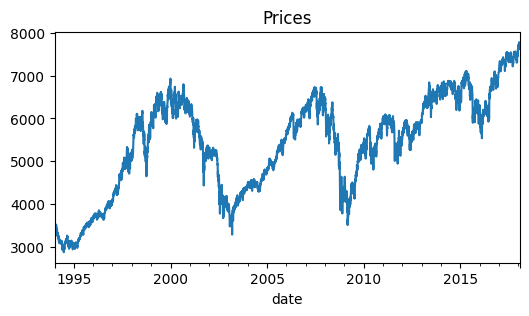

In [7]:
df_comp['market_value'] = df_comp.ftse 
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']

import matplotlib.pyplot as plt

df_comp.market_value.plot(figsize=(6,3),title = "Prices")
plt.show()


#### Splitting the test and train data (80:20)

In [8]:
size = int(len(df_comp) * 0.8)
df, df_test = df_comp[:size], df_comp[size:]

---

## Time Series Decomposition 
    Time series decomposition is the process of breaking a complex temporal signal into interpretable parts
Any time series can be decomposed into the following four components
* **Trend (T):** Long-term movement or direction in the data (increasing, decreasing, flat)
* **Seasonality (S):** Regular, repeating patterns at fixed intervals (< 1 year ⇒ (daily, weekly, yearly), eg: Temperature data) 
* **Cyclicity (C):** Gradual and relatively long term up and down movement of a series (> 2 years, eg: business performanec of a company)
* **Residual (I):** Irregular “noise” left after removing trend and seasonality.

#### Additive Decomposition
If the time series Y(t) can be expressed as the sum of all components of a time series then its called an additive time series. \
⇒  **Y(t) = T(t) + S(t) + C(t) + I(t)**
#### Multiplicative Decomposition
If the time series Y(t) can be expressed as the product of all components of a time series then its called a multiplicative time series. \
⇒  **Y(t) = T(t) * S(t) * C(t) * I(t)**
#### When to use additive and multiplicative decomposition?
If the seasonal spread (distance between peaks/troughs) is constant over time then its an additive series and \
If the seasonal spread (distance between peaks/troughs) is varying over time then its a multiplicative series.

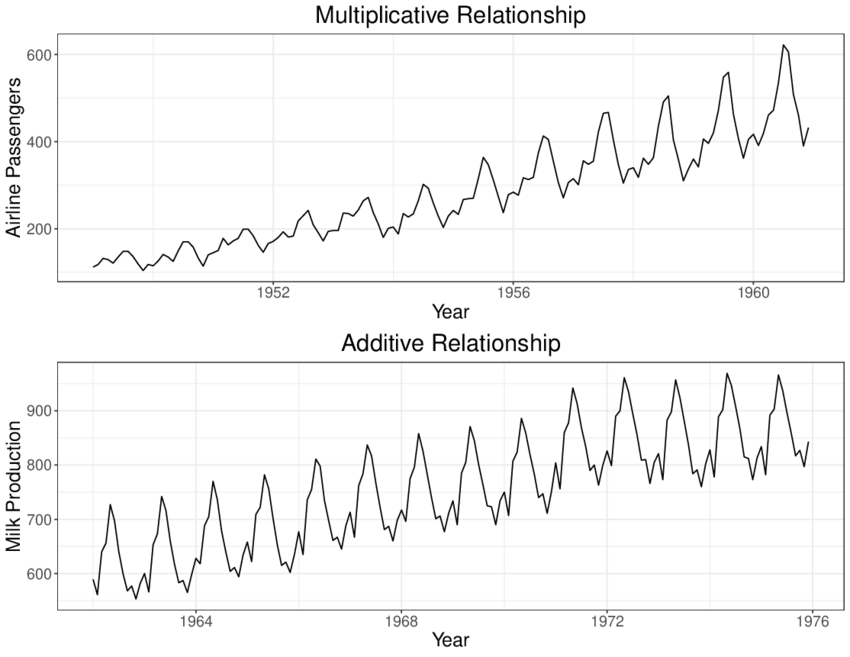

#### Types of Decomposition
Classical and STL decomposition are two important techniques in time series analysis used to break a time series into its fundamental components: trend, seasonality, and residual

#### 1. Classical Decomposition 
Classical decomposition is a traditional technique that assumes a fixed model form (additive or multiplicative) to separate components.

**Steps:**
- Estimate the trend – using a moving average (e.g., centered moving average).
- Detrend the series – subtract the trend (additive) or divide (multiplicative).
- Estimate seasonality – by averaging detrended values for each season.
- Remove trend and seasonality to get residuals.

**Limitations:**
- Assumes constant seasonality.
- Not very robust to outliers or non-linear trends.


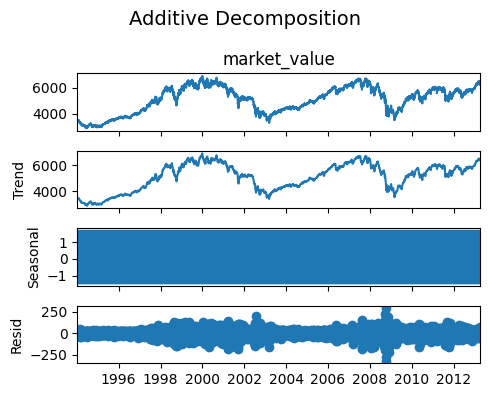

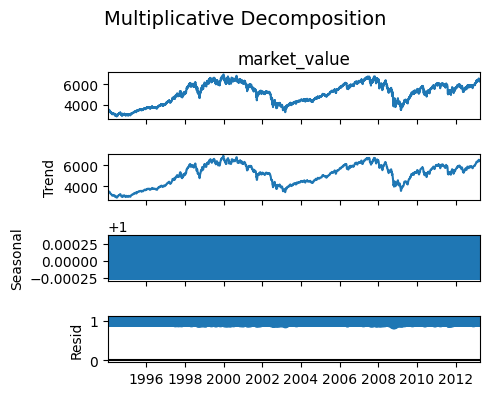

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose

sesaonal_decompose_additive = seasonal_decompose(df.market_value, model='additive')
sesaonal_decompose_multiplicative = seasonal_decompose(df.market_value, model='multiplicative')

## Classical Decomposed Components
# trend_classical = sesaonal_decompose_additive.trend
# seasonal_classical = sesaonal_decompose_additive.seasonal
# resid_classical = sesaonal_decompose_additive.resid

fig1 = sesaonal_decompose_additive.plot()
fig1.set_size_inches(5, 4)
fig1.suptitle('Additive Decomposition', fontsize=14)
fig1.tight_layout()

fig2 = sesaonal_decompose_multiplicative.plot()
fig2.set_size_inches(5, 4)
fig2.suptitle('Multiplicative Decomposition', fontsize=14)
fig2.tight_layout()

plt.show()

---

## White Noise
    Its a Time Series with no pattern, trend or seasonality
**Characteristics:**
- Constant Mean / Zero Mean
- Constant Variance
- No Auto-correlation
- Independent ⇒ WN ~ iid(0,σ²)

In [ ]:
# Our intention is to create a white noise series similar to the market value series and compare the two.
# We will generate a random white noise series using the same mean and standard deviation as the market value series.

mean = df.market_value.mean()
std = df.market_value.std()
wn = np.random.normal(loc= mean, scale= std, size= len(df))
df['White Noise'] = wn 
# df 

C:\Users\abhij\AppData\Local\Temp\ipykernel_11368\3763445999.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['White Noise'] = wn


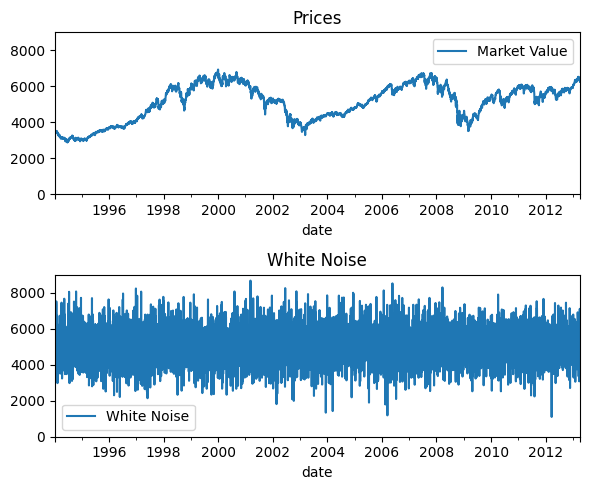

In [ ]:
# Plotting the Market Value and White Noise series for comparison
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(6, 5))

# Plot Market Value
df['market_value'].plot(ax=axes[0], title="Prices")
axes[0].set_ylim([0, 9000]) # fixing the y-axis limit for better comparison
axes[0].legend(['Market Value'])

# Plot White Noise
df['White Noise'].plot(ax=axes[1], title="White Noise")
axes[1].set_ylim([0, 9000]) # fixing the y-axis limit for better comparison
axes[1].legend(['White Noise'])

plt.tight_layout()
plt.show()

Here you can see that the White Noise plot has \
Completely random data points with no correlation between the previous values ⇒ No Auto-Correlation,\
Having a constant spread ⇒ Constant Mean, \
And located around the mean value ⇒ Constant Mean. \
\
This is a classic zero-mean, constant variance, i.i.d. process. It's exactly what residuals should look like after fitting a good time series model. \
\
. 

## Random Walk
    Its a cumulative time series where each value depends on the previous one plus some random error e ~ WN(0,σ²) and with no predictable pattern
**Characterisitcs**
* Non-Constant Mean
* Non-Constant Variance
* Autocorrelated 
* Non-Stationary
* Unpredictable trend 
* First order differencing can make the series stationary



C:\Users\abhij\AppData\Local\Temp\ipykernel_11368\516366205.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Random Walk'] = random_walk


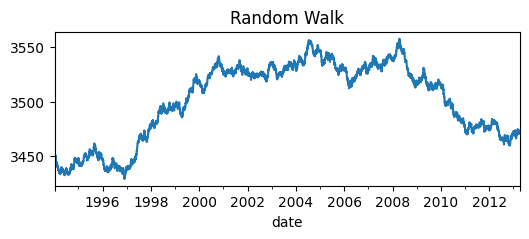

In [ ]:
# Generating a Random Walk from the Market Value Series

np.random.seed(42)
# Parameters
n = len(df) 
start_value = df['market_value'].iloc[0]   # Starting value from the market value series

white_noise = np.random.normal(loc=0, scale=1, size=n)  # Generating a white noise

# Create a random walk by cumulatively summing the white noise and adding the starting value
random_walk = np.cumsum(white_noise) + start_value

df['Random Walk'] = random_walk
df['Random Walk'].plot(figsize=(6,2), title="Random Walk")
plt.show()

The graph shows a completely random series with no trend or any statistical properties, which is a realistic example of a random walk that is similar to the stock prices.


---

## Stationarity
    Its one of the most common assumptions in time series analysis. 
    When we say a time series is staionary if the distribution or the moments (mean & variance) doesnot change over time i.e. The process is in statistical equilibrium. 
    Strong Stationarity ⇒ Time Invariant

### Weak/Covariance Stationarity
A time series is said to be weak/covariance stationary if its first and second moment are unaffected by the change in time t. \

Weak Stationary process exhibits the following properties.
* Constant Mean
* Constant Variance
* Covariance & Correlation depends only on lag h and not on time t i.e. time invariant
* Joint pdf is time dependent

**Why do we need Stationarity?** \
Stationarity assumes certain statistical properties throughout the time and makes the prediction easier. And the forecasting model requires stationarity.

### Tests For Weak Stationarity

Before looking at the tests for stationarity lets look at its deciding factor Unit Root. 

**Unit Root:** It is a characteristic of a stochastic process that indicates non-stationarity and can lead to problems in statistical inference. The presence of unit root means that the shocks to the series can have permanent effects, rather than fading away over time. That is a time series with unit root doesnot revert to a mean & variance increases over time. First order differencing helps in removing unit root and makes the series stationary.

#### 1. Augmented Dickey-Fuller Test (ADF Test)
ADF test checks the presence of a unit root in the time series. Unit root is a sign that tells you whether a time series is stationary or not. \
**H0**: Non-Stationary (Data have a unit root) \
**H1**: Stationary (Data doesnot have a unit root) 

In other words or mathematically we can say that \
**H0**: 1-lag auto-correlation coefficient (φ) < 1 \
**H1**: 1-lag auto-correlation coefficient (φ) = 1 \

**Decision Criteria** \
If ADF Statistic < Critical Value, we reject H0 &nbsp; **OR** &nbsp;  If p value < α (0.05), we reject H0




In [ ]:
from statsmodels.tsa.stattools import adfuller

adfuller(df['market_value'])

(np.float64(-1.9041551418836848),
 np.float64(0.33010893277028397),
 6,
 5014,
 {'1%': np.float64(-3.4316548765428174),
  '5%': np.float64(-2.8621166146845334),
  '10%': np.float64(-2.5670769326348926)},
 np.float64(54854.15304507557))

### Interpretation of the Output

| Metric                     | Value       |
|---------------------------|-------------|
| Test Statistic/ ADF Statistic| -1.904      |
| p-value                   | 0.330       |
| # of Lags Used            | 6           |
| # of Observations         | 5014        |
| Critical Value @ 1%       | -3.431      |
| Critical Value @ 5%       | -2.862      |
| Critical Value @ 10%      | -2.567      |
| Maximized Info Criterion  | 54854.153   |


Since (ADF Statistic) −1.904 > −2.862 (Critical Values at 5%), \
& p-value 0.330 > 0.05, we **fail to reject the null hypothesis H0**.

⇒ **The time series has a unit root, and it is non-stationary**







In [ ]:
# Similar to the market value series, we can also check the stationarity of the white noise series using the ADF test.

adfuller(df['White Noise'])

(np.float64(-51.743066515045506),
 0.0,
 1,
 5019,
 {'1%': np.float64(-3.4316535759402753),
  '5%': np.float64(-2.8621160400844468),
  '10%': np.float64(-2.567076626752987)},
 np.float64(83326.66614301746))

ADF Statistic < Critical values and the p value = 0 < 0.05, \
So we can confidently reject the null hypothesis H0 ⇒ The series is stationary \
This matches the expected behavior of a white noise, which typically has constant mean, constant variance, and no autocorrelation satisfying weak stationarity.

#### 2.Kwiatkowski–Phillips–Schmidt–Shin (KPSS) Test

Unlike ADF Test, KPSS test fits a constant mean model on the data, and it measures the cumulative sum of the residuals. 

**H0**: The series is Stationary \
**H1**: The series is Non-Stationary 

**Decision Criteria** \
If KPSS Statistic > Critical Value, we reject H0 &nbsp; **OR** &nbsp;  If p value < α (0.05), we reject H0



In [ ]:
from statsmodels.tsa.stattools import kpss

kpss(df['market_value'])

C:\Users\abhij\AppData\Local\Temp\ipykernel_11368\507423736.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss(df['market_value'])


(np.float64(2.9266109722549793),
 np.float64(0.01),
 42,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

**KPSS Test Result Interpretation**

| Metric                | Value   |
|----------------------|---------|
| Test Statistic        | 2.927   |
| p-value               | 0.01    |
| Lags Used             | 42      |
| Critical Value @ 5%   | 0.463   |

Since (KPSS Statistic) 2.927 > 0.463 (Critical Value at 5%), \
& p-value 0.01 < 0.05, we **reject the null hypothesis H0**.

⇒ **The time series is non-stationary**

### Strong/Strict Stationarity
A time series is said to be strict stationary if its joint distribution depends only on lag h not on time t.

Strong Stationary process exhibits the following properties.
* Joint pdf is time independent:- If we take two different samples of the same series, then their joint pdf doesn't depends on the time t ⇒ bothe samples follows same distribution.

Strict Stationarity is required when you consider the entire data for the analysis, hence it should have constant distribution over time. \
eg: Theoretical proofs, HFT's, etc.

### Test For Strong Stationarity

#### 1. Kolmogorov-Smirnov(KS) Test
    The KS test is a non-parametric statistical test used to compare a sample distribution to a reference distribution (like normal, uniform, etc.), or to compare two sample distributions.
    In time series, the series is split into two parts and compare if the CDF of two samples are same. If the CDFs are same then it implies strong stationarity.

Mathematically KS test calculates the maximum distance between the emperical CDFs of the samples. \
**A larger KS Statistic(0<D<1) value ⇒ the distributions differ significantly** 
- D ≈ 0.0 – 0.1: Very similar distributions
- D ≈ 0.1 – 0.3: Moderate difference
- D > 0.3: Significant difference in shape or locatio


**H0**: Follows same distirbution (Stationarity) \
**H1**: Doesn't follow same distirbution (Non-Stationarity)

**Decision Criteria** \
If KS Statistic < Critical Value, we reject H0 &nbsp; **OR** &nbsp;  If p value < α (0.05), we reject H0



In [ ]:
from scipy import stats 

# spliting the time series into two parts to compare the distiributions
midpoint = len(df)//2
sample1 = df['market_value'].iloc[:midpoint]
sample2 = df['market_value'].iloc[midpoint:]

# Run KS test to compare distributions
ks_statistic, p_value = stats.ks_2samp(sample1, sample2)
print(f"KS Statistic: {ks_statistic}, P-value: {p_value}")  

KS Statistic: 0.3796996799738521, P-value: 1.096051517068034e-161


**KS Test Interpretation** 

The KS Statistic(D) = 0.3796 > 0.3 which implies significant difference in the distribution and also p < 0.05, \
**Hence we reject H0 ⇒ The two samples of the series doesn't follow same distribution ⇒ Non-Sationarity**

**Example of a Strict Stationary Series**

A Normally distributed random noise ~ Strict Stationarity

In [ ]:
# Random Noise Example
rand_noise = np.random.normal(0,1,len(df))

# spliting the time series into two parts to compare the distiributions
sample1 = rand_noise[:midpoint]
sample2 = rand_noise[midpoint:]

# Run KS test to compare distributions
ks_statistic, p_value = stats.ks_2samp(sample1, sample2)
print(f"KS Statistic: {ks_statistic}, P-value: {p_value}") 


KS Statistic: 0.014056398856981473, P-value: 0.9609526293863792


The KS Statistic(D) = 0.014 < 0.1 which implies both the samples has very similar distribution and also p value = 0.96 > 0.05, \
**Hence we fail to reject H0 ⇒ The two samples of the series follow same distribution ⇒ Strong Sationarity**

### Non-Stationarity
    Almost all practical examples exhibits non-stationarity.
    If a process lacks statistical equilibrium, then its called a non-stationary process.

The following points are accountable for non-stationarity
* Trend
* Seasonality
* Heteroscedasticity or Changing variance

As the distribution, moments and probability laws keeps on changing over time for a non-stationary process, we convert any non-stationary component of a time series to stationary as much as possible to simplify it, to fit probability distribution and to apply statistical modelling.

---

#### ACF Plot

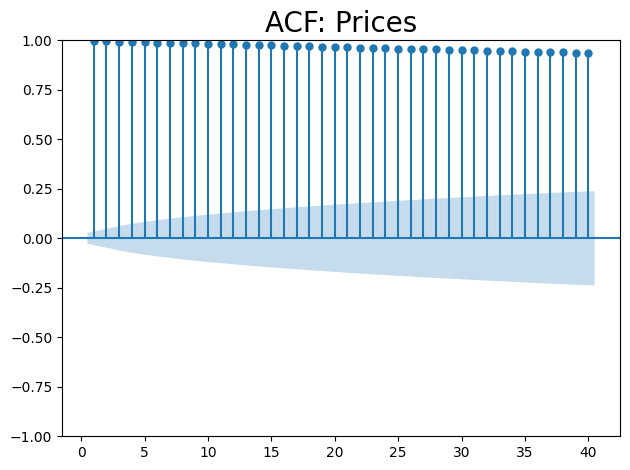

In [ ]:
import statsmodels.graphics.tsaplots as sgt

sgt.plot_acf(df.market_value, zero=False, lags=40)
plt.title('ACF: Prices', size=20)
plt.tight_layout() 
plt.show()

#### Interpretation of the ACF plot
- Bars extending above the blue confidence band ⇒ Statistically significant autocorrelations.
- Lag 1 is near +1 and staying high: Today's price is very similar to yesterday’s, and even values 20–30 lags back still influence today’s price.
- The autocorrelations remain very strong and positive for all 40 lags—well outside the confidence bounds. That’s a clear indication of Non-stationarity in the time series.


